In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/raw_data_ppg_gsr/readme.txt
/kaggle/input/raw_data_ppg_gsr/7/7/Arousal_Valence.csv
/kaggle/input/raw_data_ppg_gsr/7/7/Panas.csv
/kaggle/input/raw_data_ppg_gsr/7/7/raw_gsr.csv
/kaggle/input/raw_data_ppg_gsr/7/7/raw_ppg.csv
/kaggle/input/raw_data_ppg_gsr/7/7/Emotions.csv
/kaggle/input/raw_data_ppg_gsr/7/7/camera.csv
/kaggle/input/raw_data_ppg_gsr/47/47/Arousal_Valence.csv
/kaggle/input/raw_data_ppg_gsr/47/47/Panas.csv
/kaggle/input/raw_data_ppg_gsr/47/47/raw_gsr.csv
/kaggle/input/raw_data_ppg_gsr/47/47/raw_ppg.csv
/kaggle/input/raw_data_ppg_gsr/47/47/Emotions.csv
/kaggle/input/raw_data_ppg_gsr/47/47/camera.csv
/kaggle/input/raw_data_ppg_gsr/19/19/Arousal_Valence.csv
/kaggle/input/raw_data_ppg_gsr/19/19/Panas.csv
/kaggle/input/raw_data_ppg_gsr/19/19/raw_gsr.csv
/kaggle/input/raw_data_ppg_gsr/19/19/raw_ppg.csv
/kaggle/input/raw_data_ppg_gsr/19/19/Emotions.csv
/kaggle/input/raw_data_ppg_gsr/19/19/camera.csv
/kaggle/input/raw_data_ppg_gsr/22/22/Arousal_Valence.csv
/kaggle/input

# 2nd column is valence, 3rd column is arousal 

# 31 rows x 4 columns

In [3]:
sample_arousal_valence = pd.read_csv("/kaggle/input/raw_data_ppg_gsr/10/10/Arousal_Valence.csv")
# sample_arousal_valence = pd.read_csv("/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/10/10/Arousal_Valence.csv")
print(sample_arousal_valence)

    16  6  3  4
0   17  3  5  6
1   18  5  5  7
2   19  6  7  6
3   20  6  5  6
4   21  7  4  5
5   22  5  2  3
6   23  5  3  5
7    8  5  5  7
8    9  7  2  5
9   10  6  4  5
10  11  7  4  5
11  12  6  5  7
12  13  8  3  6
13  14  5  3  6
14  15  7  2  6
15  24  5  5  6
16  25  6  7  8
17  26  3  5  7
18  27  6  6  7
19  28  5  6  7
20  29  5  6  5
21  30  6  5  6
22  31  6  7  5
23   0  4  7  7
24   1  6  6  6
25   2  5  6  8
26   3  3  5  9
27   4  5  6  6
28   5  3  5  9
29   6  5  5  6
30   7  5  7  7


In [4]:
sample_arousal_valence.shape

(31, 4)

In [5]:
# import pandas as pd

# sample_raw_gsr = pd.read_csv('/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/10/10/raw_gsr.csv', delimiter=',', encoding='latin1')
# # print(sample_raw_ppg)
# pd.read_csv("/kaggle/input/raw_data_ppg_gsr/10/10/Arousal_Valence.csv")
# with open('/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/10/10/raw_gsr.csv', 'r') as file:
with open('/kaggle/input/raw_data_ppg_gsr/10/10/raw_gsr.csv', 'r') as file:
    for _ in range(5):
        print(file.readline())
        
# sample_raw_gsr = pd.read_csv('/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/10/10/raw_gsr.csv')

1653098503514,167626.65625

,167471.5

,167102.015625

,166955.375

1653098504514,166100.59375



In [6]:
# with open('/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/10/10/raw_gsr.csv', 'r') as file:
with open('/kaggle/input/raw_data_ppg_gsr/10/10/raw_gsr.csv', 'r') as file:
    for i, line in enumerate(file):
        if 40 <= i <= 50:  # Print lines near the problematic line
            print(f"Line {i}: {line}")


Line 40: 1653098513514,160582.453125

Line 41: ,161048.28125

Line 42: ,161530.78125

Line 43: ,161736.203125

Line 44: 1653098514514,162662.21875,60

Line 45: ,162934.453125

Line 46: ,163200.359375

Line 47: ,162932.984375

Line 48: 1653098515514,161923.4375

Line 49: ,160348.984375

Line 50: ,158409.1875



3.
raw_gsr.csv: This CSV file contains the raw GSR data. For each line, the first item (if not null) represents the timestamp. The second item denotes the GSR data. The third item stores trigger information. Similar to camera.csv, we use k + 10 and k + 100 to indicate the start and stop of the k-th video, respectively.

4.
raw_ppg.csv: This CSV file contains the raw PPG data. The organization structure of PPG data is the same as GSR data in raw_gsr.csv. The only difference between raw_ppg.csv and raw_gsr.csv is the number of lines per second (100 lines per second for PPG and 4 lines for GSR due to different sampling rates).

In [7]:
# with open('/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/10/10/raw_gsr.csv', 'r') as file:
with open('/kaggle/input/raw_data_ppg_gsr/10/10/raw_gsr.csv', 'r') as file:
    for _ in range(55):
        print(file.readline())

1653098503514,167626.65625

,167471.5

,167102.015625

,166955.375

1653098504514,166100.59375

,166128.859375

,165834.359375

,164697.875

1653098505514,162906.546875

,160625.859375

,157993.640625

,155868.5625

1653098506514,154536.578125

,153685.015625

,153312.03125

,153390.703125

1653098507514,153859.90625

,154674.765625

,155562.28125

,156477.078125

1653098508514,157111.984375

,157485.46875

,157590.515625

,157376.78125

1653098509514,156990.3125

,156641.3125

,156430.09375

,156397.296875

1653098510514,156580.859375

,158044.28125

,157763.8125

,157835.984375

1653098511514,158431.25

,159343.4375

,159119.765625

,160388.265625

1653098512514,160691.28125

,160694.125

,160889.1875

,160626.421875

1653098513514,160582.453125

,161048.28125

,161530.78125

,161736.203125

1653098514514,162662.21875,60

,162934.453125

,163200.359375

,162932.984375

1653098515514,161923.4375

,160348.984375

,158409.1875

,156600.25

1653098516514,155188.796875

,154266.671875

,1

In [10]:
# for gsr

# sample_raw_gsr = pd.read_csv(
#     '/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/10/10/raw_gsr.csv', 
#     names=['timestamp', 'gsr_value', 'extra_column'],  # Define expected columns
#     na_values=[''],  # Treat empty strings as NaN
#     skiprows=1  # Skip header if needed
# )

sample_raw_gsr = pd.read_csv(
    '/kaggle/input/raw_data_ppg_gsr/10/10/raw_gsr.csv', 
    names=['timestamp', 'gsr_value', 'start_stop_trigger'],  # Define expected columns
    na_values=[''],  # Treat empty strings as NaN
#     skiprows=1  # Skip header if needed
)

In [11]:
# Get unique start_stop_triggers
unique_triggers = sample_raw_gsr['start_stop_trigger'].unique().tolist()

# Find the positions (row numbers) of each unique start_stop_trigger
trigger_positions = {trigger: sample_raw_gsr[sample_raw_gsr['start_stop_trigger'] == trigger].index.tolist()
                     for trigger in unique_triggers}

# Print the results
print("Unique start_stop_triggers:", unique_triggers)
print("Positions of start_stop_triggers:", trigger_positions)

Unique start_stop_triggers: [nan, 60.0, 150.0, 50.0, 140.0, 26.0, 116.0, 27.0, 117.0, 28.0, 118.0, 29.0, 119.0, 30.0, 120.0, 31.0, 121.0, 32.0, 122.0, 33.0, 123.0, 18.0, 108.0, 19.0, 109.0, 20.0, 110.0, 21.0, 111.0, 22.0, 112.0, 23.0, 113.0, 24.0, 114.0, 25.0, 115.0, 34.0, 124.0, 35.0, 125.0, 36.0, 126.0, 37.0, 127.0, 38.0, 128.0, 39.0, 129.0, 40.0, 130.0, 41.0, 131.0, 10.0, 100.0, 11.0, 101.0, 12.0, 102.0, 13.0, 103.0, 14.0, 104.0, 15.0, 105.0, 16.0, 106.0, 17.0, 107.0]
Positions of start_stop_triggers: {nan: [], 60.0: [44], 150.0: [292], 50.0: [824], 140.0: [1596], 26.0: [1612], 116.0: [1740], 27.0: [2036], 117.0: [2160], 28.0: [2448], 118.0: [2568], 29.0: [2808], 119.0: [2940], 30.0: [3176], 120.0: [3312], 31.0: [3560], 121.0: [3672], 32.0: [3912], 122.0: [4052], 33.0: [4300], 123.0: [4404], 18.0: [5132], 108.0: [5228], 19.0: [5496], 109.0: [5596], 20.0: [5856], 110.0: [5984], 21.0: [6288], 111.0: [6420], 22.0: [6656], 112.0: [6760], 23.0: [7020], 113.0: [7136], 24.0: [7380], 114.0:

In [9]:
print(sample_raw_gsr)

          timestamp      gsr_value  start_stop_trigger
0      1.653099e+12  167626.656250                 NaN
1               NaN  167471.500000                 NaN
2               NaN  167102.015625                 NaN
3               NaN  166955.375000                 NaN
4      1.653099e+12  166100.593750                 NaN
...             ...            ...                 ...
14683           NaN  158623.375000                 NaN
14684  1.653102e+12  158737.984375                 NaN
14685           NaN  159241.437500                 NaN
14686           NaN  159396.109375                 NaN
14687           NaN  159654.781250                 NaN

[14688 rows x 3 columns]


In [13]:
# import pandas as pd

# # Load the raw GSR data
# sample_raw_gsr = pd.read_csv('/kaggle/input/raw_data_ppg_gsr/10/10/raw_gsr.csv',
#                              names=['timestamp', 'gsr_value', 'start_stop_trigger'],
#                              na_values=[''])

# # Load the Arousal_Valence ratings
# arousal_valence_df = pd.read_csv('/kaggle/input/raw_data_ppg_gsr/10/10/Arousal_Valence.csv', 
#                                  names=['video_id', 'valence', 'arousal', 'dominance'])

# # Dictionary to store data intervals for each video ID
# data_intervals = {}

# for k in range(32):  # video IDs from 0 to 31
#     # Define start and stop triggers
#     start_trigger = k + 10
#     stop_trigger = k + 100

#     # Find the row indices for start and stop triggers
#     start_index = sample_raw_gsr[sample_raw_gsr['start_stop_trigger'] == start_trigger].index
#     stop_index = sample_raw_gsr[sample_raw_gsr['start_stop_trigger'] == stop_trigger].index

#     # Ensure start and stop triggers exist and capture the interval
#     if not start_index.empty and not stop_index.empty:
#         interval_data = sample_raw_gsr.loc[start_index[0]:stop_index[0], ['timestamp', 'gsr_value']]
#         data_intervals[k] = interval_data  # Store interval data for video ID k

# # Print or use data_intervals as needed to analyze arousal and valence correlations
# # Print each interval data for each video ID
# for video_id, interval_data in data_intervals.items():
#     print(f"Video ID: {video_id}")
#     print(interval_data)
#     print("\n" + "="*50 + "\n")  # Separator between intervals

Video ID: 0
          timestamp      gsr_value
11888  1.653101e+12  142655.656250
11889           NaN  142742.453125
11890           NaN  142593.984375
11891           NaN  142273.656250
11892  1.653101e+12  142077.000000
...             ...            ...
11972  1.653101e+12  136347.203125
11973           NaN  136767.421875
11974           NaN  137173.843750
11975           NaN  137517.937500
11976  1.653101e+12  137926.171875

[89 rows x 2 columns]


Video ID: 1
          timestamp      gsr_value
12200  1.653101e+12  126280.367188
12201           NaN  126448.867188
12202           NaN  125893.757812
12203           NaN  125096.867188
12204  1.653101e+12  124509.890625
...             ...            ...
12328  1.653101e+12  142274.187500
12329           NaN  142288.515625
12330           NaN  142354.046875
12331           NaN  142410.640625
12332  1.653101e+12  142470.031250

[133 rows x 2 columns]


Video ID: 2
          timestamp      gsr_value
12548  1.653101e+12  133251.906250
125

In [14]:
import pandas as pd

# Load the raw GSR data
sample_raw_gsr = pd.read_csv('/kaggle/input/raw_data_ppg_gsr/10/10/raw_gsr.csv',
                             names=['timestamp', 'gsr_value', 'start_stop_trigger'],
                             na_values=[''])

# Load the Arousal_Valence ratings
arousal_valence_df = pd.read_csv('/kaggle/input/raw_data_ppg_gsr/10/10/Arousal_Valence.csv', 
                                 names=['video_id', 'valence', 'arousal', 'dominance'])

# Dictionary to store data intervals with arousal and valence labels for each video ID
data_intervals_with_labels = {}

for k in range(32):  # video IDs from 0 to 31
    # Define start and stop triggers
    start_trigger = k + 10
    stop_trigger = k + 100

    # Find the row indices for start and stop triggers
    start_index = sample_raw_gsr[sample_raw_gsr['start_stop_trigger'] == start_trigger].index
    stop_index = sample_raw_gsr[sample_raw_gsr['start_stop_trigger'] == stop_trigger].index

    # Ensure start and stop triggers exist and capture the interval
    if not start_index.empty and not stop_index.empty:
        interval_data = sample_raw_gsr.loc[start_index[0]:stop_index[0], ['timestamp', 'gsr_value']]

        # Retrieve the arousal and valence values for the current video ID
        valence = arousal_valence_df.loc[arousal_valence_df['video_id'] == k, 'valence'].values[0]
        arousal = arousal_valence_df.loc[arousal_valence_df['video_id'] == k, 'arousal'].values[0]

        # Store interval data along with valence and arousal labels
        data_intervals_with_labels[k] = {
            'gsr_data': interval_data,
            'valence': valence,
            'arousal': arousal
        }

# Print the GSR data intervals with their corresponding valence and arousal values
for video_id, data in data_intervals_with_labels.items():
    print(f"Video ID: {video_id}")
    print("Valence:", data['valence'])
    print("Arousal:", data['arousal'])
    print("GSR Data:")
    print(data['gsr_data'])
    print("\n" + "="*50 + "\n")  # Separator between intervals


Video ID: 0
Valence: 4
Arousal: 7
GSR Data:
          timestamp      gsr_value
11888  1.653101e+12  142655.656250
11889           NaN  142742.453125
11890           NaN  142593.984375
11891           NaN  142273.656250
11892  1.653101e+12  142077.000000
...             ...            ...
11972  1.653101e+12  136347.203125
11973           NaN  136767.421875
11974           NaN  137173.843750
11975           NaN  137517.937500
11976  1.653101e+12  137926.171875

[89 rows x 2 columns]


Video ID: 1
Valence: 6
Arousal: 6
GSR Data:
          timestamp      gsr_value
12200  1.653101e+12  126280.367188
12201           NaN  126448.867188
12202           NaN  125893.757812
12203           NaN  125096.867188
12204  1.653101e+12  124509.890625
...             ...            ...
12328  1.653101e+12  142274.187500
12329           NaN  142288.515625
12330           NaN  142354.046875
12331           NaN  142410.640625
12332  1.653101e+12  142470.031250

[133 rows x 2 columns]


Video ID: 2
Valence: 

# Use start stop triggers to match data time intervals

In [15]:
import pandas as pd

# Load the raw PPG data
sample_raw_ppg = pd.read_csv('/kaggle/input/raw_data_ppg_gsr/10/10/raw_ppg.csv',
                             names=['timestamp', 'ppg_value', 'start_stop_trigger'],
                             na_values=[''])

# Load the Arousal_Valence ratings
arousal_valence_df = pd.read_csv('/kaggle/input/raw_data_ppg_gsr/10/10/Arousal_Valence.csv', 
                                 names=['video_id', 'valence', 'arousal', 'dominance'])

# Dictionary to store data intervals with arousal and valence labels for each video ID
ppg_data_intervals_with_labels = {}

for k in range(32):  # video IDs from 0 to 31
    # Define start and stop triggers
    start_trigger = k + 10
    stop_trigger = k + 100

    # Find the row indices for start and stop triggers
    start_index = sample_raw_ppg[sample_raw_ppg['start_stop_trigger'] == start_trigger].index
    stop_index = sample_raw_ppg[sample_raw_ppg['start_stop_trigger'] == stop_trigger].index

    # Ensure start and stop triggers exist and capture the interval
    if not start_index.empty and not stop_index.empty:
        interval_data = sample_raw_ppg.loc[start_index[0]:stop_index[0], ['timestamp', 'ppg_value']]

        # Retrieve the arousal and valence values for the current video ID
        valence = arousal_valence_df.loc[arousal_valence_df['video_id'] == k, 'valence'].values[0]
        arousal = arousal_valence_df.loc[arousal_valence_df['video_id'] == k, 'arousal'].values[0]

        # Store interval data along with valence and arousal labels
        ppg_data_intervals_with_labels[k] = {
            'ppg_data': interval_data,
            'valence': valence,
            'arousal': arousal
        }

# Print the PPG data intervals with their corresponding valence and arousal values
for video_id, data in ppg_data_intervals_with_labels.items():
    print(f"Video ID: {video_id}")
    print("Valence:", data['valence'])
    print("Arousal:", data['arousal'])
    print("PPG Data:")
    print(data['ppg_data'])
    print("\n" + "="*50 + "\n")  # Separator between intervals


Video ID: 0
Valence: 4
Arousal: 7
PPG Data:
           timestamp  ppg_value
282000  1.653101e+12   549489.0
282001           NaN   549794.0
282002           NaN   550025.0
282003           NaN   550289.0
282004           NaN   550694.0
...              ...        ...
284096           NaN   569059.0
284097           NaN   569434.0
284098           NaN   569787.0
284099           NaN   570150.0
284100  1.653101e+12   570501.0

[2101 rows x 2 columns]


Video ID: 1
Valence: 6
Arousal: 6
PPG Data:
           timestamp  ppg_value
289400  1.653101e+12   650818.0
289401           NaN   649766.0
289402           NaN   648885.0
289403           NaN   648004.0
289404           NaN   647274.0
...              ...        ...
292496           NaN   555610.0
292497           NaN   555948.0
292498           NaN   556124.0
292499           NaN   556374.0
292500  1.653101e+12   556694.0

[3101 rows x 2 columns]


Video ID: 2
Valence: 5
Arousal: 6
PPG Data:
           timestamp  ppg_value
297700  1.6531

# Iterate through all subject folders and obtain their data intervals based on start stop trigger & arousal and valence

In [28]:
import os
import pandas as pd

base_dir = '/kaggle/input/raw_data_ppg_gsr/'
data_intervals = []

# Function to load and process PPG or GSR data
def load_sensor_data(file_path, start_trigger, stop_trigger, value_column):
    data = pd.read_csv(file_path, names=['timestamp', value_column, 'start_stop_trigger'], na_values=[''])
    start_index = data[data['start_stop_trigger'] == start_trigger].index
    stop_index = data[data['start_stop_trigger'] == stop_trigger].index
    if not start_index.empty and not stop_index.empty:
        return data.loc[start_index[0]:stop_index[0], value_column].values
    else:
        return None

# Iterate over each subject's folder
for subject_id in os.listdir(base_dir):
    subject_path = os.path.join(base_dir, subject_id, subject_id)
    
    # Check if the folder name is purely numeric (indicating a subject)
    if os.path.isdir(subject_path) and subject_id.isdigit():
        
        # Load arousal and valence labels for this subject
        arousal_valence_path = os.path.join(subject_path, 'Arousal_Valence.csv')
        arousal_valence_df = pd.read_csv(arousal_valence_path, names=['video_id', 'valence', 'arousal', 'dominance'])
        
#         # Iterate over each video ID for the subject
#         for video_id in range(32):  # Assuming video IDs range from 0 to 31
#             video_folder = os.path.join(subject_path, str(video_id))
            
        # Paths to GSR and PPG data files
        gsr_path = os.path.join(subject_path, 'raw_gsr.csv')
        print(gsr_path)
        ppg_path = os.path.join(subject_path, 'raw_ppg.csv')
        print(ppg_path)

        # Only process if both GSR and PPG data files exist
        if os.path.exists(gsr_path) and os.path.exists(ppg_path):

            for k in range(32):  # Loop over each video ID's start/stop triggers
                start_trigger = k + 10
                stop_trigger = k + 100

                # Load GSR data interval
                gsr_interval = load_sensor_data(gsr_path, start_trigger, stop_trigger, 'gsr_value')

                # Load PPG data interval
                ppg_interval = load_sensor_data(ppg_path, start_trigger, stop_trigger, 'ppg_value')

                # Check if intervals are valid and retrieve labels
                if gsr_interval is not None and ppg_interval is not None:
                    valence = arousal_valence_df.loc[arousal_valence_df['video_id'] == k, 'valence'].values[0]
                    arousal = arousal_valence_df.loc[arousal_valence_df['video_id'] == k, 'arousal'].values[0]

                    # Append data to the intervals list for model input
                    data_intervals.append({
                        'subject_id': subject_id,
                        'video_id': k,
                        'gsr_data': gsr_interval,
                        'ppg_data': ppg_interval,
                        'valence': valence,
                        'arousal': arousal
                    })
#                         print(data_intervals)

# Print a few samples to verify data
for data in data_intervals[:5]:  # Print first 5 samples as a check
    print(f"Subject ID: {data['subject_id']}, Video ID: {data['video_id']}")
    print("Valence:", data['valence'])
    print("Arousal:", data['arousal'])
    print("GSR Data:", data['gsr_data'])
    print("PPG Data:", data['ppg_data'])
    print("\n" + "="*50 + "\n")  # Separator between samples

# The data_intervals list now contains input sequences and labels for multi-input LSTM

print(data)

/kaggle/input/raw_data_ppg_gsr/7/7/raw_gsr.csv
/kaggle/input/raw_data_ppg_gsr/7/7/raw_ppg.csv
/kaggle/input/raw_data_ppg_gsr/47/47/raw_gsr.csv
/kaggle/input/raw_data_ppg_gsr/47/47/raw_ppg.csv
/kaggle/input/raw_data_ppg_gsr/19/19/raw_gsr.csv
/kaggle/input/raw_data_ppg_gsr/19/19/raw_ppg.csv
/kaggle/input/raw_data_ppg_gsr/22/22/raw_gsr.csv
/kaggle/input/raw_data_ppg_gsr/22/22/raw_ppg.csv
/kaggle/input/raw_data_ppg_gsr/2/2/raw_gsr.csv
/kaggle/input/raw_data_ppg_gsr/2/2/raw_ppg.csv
/kaggle/input/raw_data_ppg_gsr/35/35/raw_gsr.csv
/kaggle/input/raw_data_ppg_gsr/35/35/raw_ppg.csv
/kaggle/input/raw_data_ppg_gsr/50/50/raw_gsr.csv
/kaggle/input/raw_data_ppg_gsr/50/50/raw_ppg.csv
/kaggle/input/raw_data_ppg_gsr/23/23/raw_gsr.csv
/kaggle/input/raw_data_ppg_gsr/23/23/raw_ppg.csv
/kaggle/input/raw_data_ppg_gsr/10/10/raw_gsr.csv
/kaggle/input/raw_data_ppg_gsr/10/10/raw_ppg.csv
/kaggle/input/raw_data_ppg_gsr/5/5/raw_gsr.csv
/kaggle/input/raw_data_ppg_gsr/5/5/raw_ppg.csv
/kaggle/input/raw_data_ppg_gsr/6

In [29]:
print(len(data))

6


In [30]:
print(len(data_intervals))

2336


# Multi input LSTM with separate layer for PPG & GSR

Using device: cuda
Epoch [1/200], Train Loss: 27.3702, Validation Loss: 27.2281, Validation Accuracy: 0.00%
Epoch [2/200], Train Loss: 25.7787, Validation Loss: 24.3812, Validation Accuracy: 0.11%
Epoch [3/200], Train Loss: 14.8832, Validation Loss: 7.3095, Validation Accuracy: 12.93%
Epoch [4/200], Train Loss: 4.9251, Validation Loss: 4.4525, Validation Accuracy: 17.41%
Epoch [5/200], Train Loss: 3.6723, Validation Loss: 4.0822, Validation Accuracy: 17.52%
Epoch [6/200], Train Loss: 3.5550, Validation Loss: 4.0393, Validation Accuracy: 17.52%
Epoch [7/200], Train Loss: 3.5350, Validation Loss: 4.0265, Validation Accuracy: 17.52%
Epoch [8/200], Train Loss: 3.5319, Validation Loss: 4.0156, Validation Accuracy: 17.52%
Epoch [9/200], Train Loss: 3.5082, Validation Loss: 4.0041, Validation Accuracy: 17.52%
Epoch [10/200], Train Loss: 3.5010, Validation Loss: 3.9964, Validation Accuracy: 17.52%
Epoch [11/200], Train Loss: 3.4910, Validation Loss: 3.9848, Validation Accuracy: 17.52%
Epoch [1

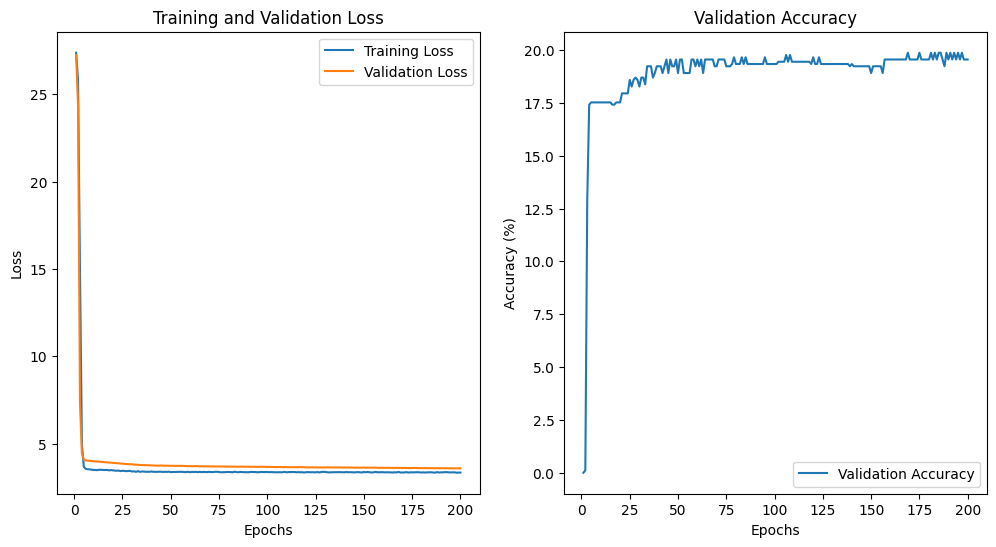

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, TensorDataset
import matplotlib.pyplot as plt

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Assume data_intervals is already populated from previous steps

# Split data into train and test sets (80% train, 20% test)
train_size = int(0.8 * len(data_intervals))
test_size = len(data_intervals) - train_size
train_data, test_data = random_split(data_intervals, [train_size, test_size])

# Convert data_intervals entries into tensors for PyTorch
def prepare_data(data):
    ppg_sequences = []
    gsr_sequences = []
    labels = []

    for item in data:
        ppg_sequences.append(torch.tensor(item['ppg_data'], dtype=torch.float32))
        gsr_sequences.append(torch.tensor(item['gsr_data'], dtype=torch.float32))
        labels.append(torch.tensor([item['arousal'], item['valence']], dtype=torch.float32))

    # Stack sequences and labels to create tensor batches
    ppg_sequences = nn.utils.rnn.pad_sequence(ppg_sequences, batch_first=True)
    gsr_sequences = nn.utils.rnn.pad_sequence(gsr_sequences, batch_first=True)
    labels = torch.stack(labels)

    return TensorDataset(ppg_sequences, gsr_sequences, labels)

train_dataset = prepare_data(train_data)
test_dataset = prepare_data(test_data)

# Load data into DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define the LSTM model with separate layers for PPG and GSR data
class MultiInputLSTM(nn.Module):
    def __init__(self, input_size_ppg, input_size_gsr, hidden_size, output_size, num_layers=1):
        super(MultiInputLSTM, self).__init__()
        # LSTM for PPG data
        self.lstm_ppg = nn.LSTM(input_size_ppg, hidden_size, num_layers, batch_first=True)
        
        # LSTM for GSR data
        self.lstm_gsr = nn.LSTM(input_size_gsr, hidden_size, num_layers, batch_first=True)
        
        # Fully connected layer to combine the outputs and predict arousal and valence
        self.fc = nn.Linear(hidden_size * 2, output_size)

    def forward(self, ppg_data, gsr_data):
        # PPG LSTM forward
        _, (h_ppg, _) = self.lstm_ppg(ppg_data)
        h_ppg = h_ppg[-1]  # Take the final hidden state

        # GSR LSTM forward
        _, (h_gsr, _) = self.lstm_gsr(gsr_data)
        h_gsr = h_gsr[-1]  # Take the final hidden state

        # Concatenate the hidden states from both LSTMs
        combined = torch.cat((h_ppg, h_gsr), dim=1)
        
        # Fully connected output layer
        output = self.fc(combined)
        return output

# Model parameters
input_size_ppg = 1  # Assuming PPG data is a single feature per timestep
input_size_gsr = 1  # Assuming GSR data is a single feature per timestep
hidden_size = 64
output_size = 2  # Arousal and Valence
num_layers = 1

# Instantiate the model, loss function, and optimizer
model = MultiInputLSTM(input_size_ppg, input_size_gsr, hidden_size, output_size, num_layers)
model.to(device)  # Move model to GPU if available
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training function with validation evaluation
def train(model, train_loader, test_loader, criterion, optimizer, epochs=50):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        model.train()
        total_train_loss = 0

        for ppg_data, gsr_data, labels in train_loader:
            ppg_data = ppg_data.unsqueeze(-1).to(device)  # Move data to GPU
            gsr_data = gsr_data.unsqueeze(-1).to(device)  # Move data to GPU
            labels = labels.to(device)  # Move labels to GPU
            
            # Zero the gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(ppg_data, gsr_data)
            loss = criterion(outputs, labels)
            total_train_loss += loss.item()
            
            # Backward and optimize
            loss.backward()
            optimizer.step()
        
        # Calculate average training loss
        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        
        # Evaluate on validation set
        val_loss, val_accuracy = evaluate(model, test_loader, criterion)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch [{epoch+1}/{epochs}], "
              f"Train Loss: {avg_train_loss:.4f}, "
              f"Validation Loss: {val_loss:.4f}, "
              f"Validation Accuracy: {val_accuracy:.2f}%")

    return train_losses, val_losses, val_accuracies

# Evaluation function
def evaluate(model, data_loader, criterion):
    model.eval()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for ppg_data, gsr_data, labels in data_loader:
            ppg_data = ppg_data.unsqueeze(-1).to(device)  # Move data to GPU
            gsr_data = gsr_data.unsqueeze(-1).to(device)  # Move data to GPU
            labels = labels.to(device)  # Move labels to GPU
            outputs = model(ppg_data, gsr_data)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            # Calculate accuracy based on mean absolute error tolerance
            predictions = outputs.round()  # Rounding predictions to nearest integer
            correct_predictions += (predictions == labels).sum().item()
            total_predictions += labels.numel()

    avg_loss = total_loss / len(data_loader)
    accuracy = (correct_predictions / total_predictions) * 100
    return avg_loss, accuracy

# Train the model and retrieve metrics
epochs = 200
train_losses, val_losses, val_accuracies = train(model, train_loader, test_loader, criterion, optimizer, epochs=epochs)

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plotting validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Validation Accuracy')

plt.show()


In [33]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, random_split, TensorDataset
# import matplotlib.pyplot as plt

# # Assume data_intervals is already populated from previous steps

# # Split data into train and test sets (80% train, 20% test)
# train_size = int(0.8 * len(data_intervals))
# test_size = len(data_intervals) - train_size
# train_data, test_data = random_split(data_intervals, [train_size, test_size])

# # Convert data_intervals entries into tensors for PyTorch
# def prepare_data(data):
#     ppg_sequences = []
#     gsr_sequences = []
#     labels = []

#     for item in data:
#         ppg_sequences.append(torch.tensor(item['ppg_data'], dtype=torch.float32))
#         gsr_sequences.append(torch.tensor(item['gsr_data'], dtype=torch.float32))
#         labels.append(torch.tensor([item['arousal'], item['valence']], dtype=torch.float32))

#     # Stack sequences and labels to create tensor batches
#     ppg_sequences = nn.utils.rnn.pad_sequence(ppg_sequences, batch_first=True)
#     gsr_sequences = nn.utils.rnn.pad_sequence(gsr_sequences, batch_first=True)
#     labels = torch.stack(labels)

#     return TensorDataset(ppg_sequences, gsr_sequences, labels)

# train_dataset = prepare_data(train_data)
# test_dataset = prepare_data(test_data)

# # Load data into DataLoaders
# batch_size = 32
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=batch_size)

# # Define the LSTM model with separate layers for PPG and GSR data
# class MultiInputLSTM(nn.Module):
#     def __init__(self, input_size_ppg, input_size_gsr, hidden_size, output_size, num_layers=1):
#         super(MultiInputLSTM, self).__init__()
#         # LSTM for PPG data
#         self.lstm_ppg = nn.LSTM(input_size_ppg, hidden_size, num_layers, batch_first=True)
        
#         # LSTM for GSR data
#         self.lstm_gsr = nn.LSTM(input_size_gsr, hidden_size, num_layers, batch_first=True)
        
#         # Fully connected layer to combine the outputs and predict arousal and valence
#         self.fc = nn.Linear(hidden_size * 2, output_size)

#     def forward(self, ppg_data, gsr_data):
#         # PPG LSTM forward
#         _, (h_ppg, _) = self.lstm_ppg(ppg_data)
#         h_ppg = h_ppg[-1]  # Take the final hidden state

#         # GSR LSTM forward
#         _, (h_gsr, _) = self.lstm_gsr(gsr_data)
#         h_gsr = h_gsr[-1]  # Take the final hidden state

#         # Concatenate the hidden states from both LSTMs
#         combined = torch.cat((h_ppg, h_gsr), dim=1)
        
#         # Fully connected output layer
#         output = self.fc(combined)
#         return output

# # Model parameters
# input_size_ppg = 1  # Assuming PPG data is a single feature per timestep
# input_size_gsr = 1  # Assuming GSR data is a single feature per timestep
# hidden_size = 64
# output_size = 2  # Arousal and Valence
# num_layers = 1

# # Instantiate the model, loss function, and optimizer
# model = MultiInputLSTM(input_size_ppg, input_size_gsr, hidden_size, output_size, num_layers)
# criterion = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.0001)

# # Training function with validation evaluation
# def train(model, train_loader, test_loader, criterion, optimizer, epochs=50):
#     train_losses = []
#     val_losses = []
#     train_accuracies = []
#     val_accuracies = []

#     for epoch in range(epochs):
#         model.train()
#         total_train_loss = 0

#         for ppg_data, gsr_data, labels in train_loader:
#             ppg_data = ppg_data.unsqueeze(-1)
#             gsr_data = gsr_data.unsqueeze(-1)
            
#             # Zero the gradients
#             optimizer.zero_grad()
            
#             # Forward pass
#             outputs = model(ppg_data, gsr_data)
#             loss = criterion(outputs, labels)
#             total_train_loss += loss.item()
            
#             # Backward and optimize
#             loss.backward()
#             optimizer.step()
        
#         # Calculate average training loss
#         avg_train_loss = total_train_loss / len(train_loader)
#         train_losses.append(avg_train_loss)
        
#         # Evaluate on validation set
#         val_loss, val_accuracy = evaluate(model, test_loader, criterion)
#         val_losses.append(val_loss)
#         val_accuracies.append(val_accuracy)

#         print(f"Epoch [{epoch+1}/{epochs}], "
#               f"Train Loss: {avg_train_loss:.4f}, "
#               f"Validation Loss: {val_loss:.4f}, "
#               f"Validation Accuracy: {val_accuracy:.2f}%")

#     return train_losses, val_losses, val_accuracies

# # Evaluation function
# def evaluate(model, data_loader, criterion):
#     model.eval()
#     total_loss = 0
#     correct_predictions = 0
#     total_predictions = 0

#     with torch.no_grad():
#         for ppg_data, gsr_data, labels in data_loader:
#             ppg_data = ppg_data.unsqueeze(-1)
#             gsr_data = gsr_data.unsqueeze(-1)
#             outputs = model(ppg_data, gsr_data)
#             loss = criterion(outputs, labels)
#             total_loss += loss.item()

#             # Calculate accuracy based on mean absolute error tolerance
#             predictions = outputs.round()  # Rounding predictions to nearest integer
#             correct_predictions += (predictions == labels).sum().item()
#             total_predictions += labels.numel()

#     avg_loss = total_loss / len(data_loader)
#     accuracy = (correct_predictions / total_predictions) * 100
#     return avg_loss, accuracy

# # Train the model and retrieve metrics
# epochs = 200
# train_losses, val_losses, val_accuracies = train(model, train_loader, test_loader, criterion, optimizer, epochs=epochs)

# # Plotting training and validation loss
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
# plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.title('Training and Validation Loss')

# # Plotting validation accuracy
# plt.subplot(1, 2, 2)
# plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy (%)')
# plt.legend()
# plt.title('Validation Accuracy')

# plt.show()


Epoch [1/200], Train Loss: 27.0763, Validation Loss: 26.1046, Validation Accuracy: 0.00%


KeyboardInterrupt: 

In [25]:
# # Get unique values in the start_stop_trigger column
# unique_triggers = sample_raw_ppg['start_stop_trigger'].unique()
# unique_triggers_num = sample_raw_ppg['start_stop_trigger'].nunique()
# # Print the unique start_stop_trigger values
# print("Unique start_stop_triggers in PPG data:", unique_triggers)
# print(unique_triggers_num)

In [ ]:
# print(sample_raw_gsr['gsr_value'])

# gsr_10 = sample_raw_gsr['gsr_value']


In [ ]:
# print(gsr_10)

In [ ]:
# gsr_10.shape

In [ ]:
# # for ppg

# # sample_raw_ppg = pd.read_csv(
# #    '/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/10/10/raw_ppg.csv', 
# #     names=['timestamp', 'ppg_value', 'extra_column'],  # Define expected columns
# #     na_values=[''],  # Treat empty strings as NaN
# #     skiprows=1  # Skip header if needed
# # )
# sample_raw_ppg = pd.read_csv(
#    '/kaggle/input/raw_data_ppg_gsr/10/10/raw_ppg.csv', 
#     names=['timestamp', 'ppg_value', 'extra_column'],  # Define expected columns
#     na_values=[''],  # Treat empty strings as NaN
#     skiprows=1  # Skip header if needed
# )
# print(sample_raw_ppg['ppg_value'])
# ppg_10 = sample_raw_ppg['ppg_value']

In [ ]:
# ppg_10.shape

# Organize data as shown below :

X_train :

| subject_id | sequence_id | ppg_series | gsr_series |
|------------|-------------|------------|------------|
| 1          | 1           | [...]      | [...]      |
| 1          | 2           | [...]      | [...]      |
| 1          | 3           | [...]      | [...]      |
| 2          | 1           | [...]      | [...]      |
| 2          | 2           | [...]      | [...]      |
| 2          | 3           | [...]      | [...]      |


y_train :

| subject_id | sequence_id | arousal | valence |
|------------|-------------|---------|---------|
| 1          | 1           | 7       | 6       |
| 1          | 2           | 9       | 8       |
| 1          | 3           | 4       | 5       |
| 2          | 1           | 6       | 2       |
| 2          | 2           | 8       | 4       |
| 2          | 3           | 5       | 6       |

# Updated features_target dataframe

| subject_id | series_id | ppg_series | gsr_series | Target |
|------------|-----------|------------|------------|--------|
| 1          | 1         | [...]      | [...]      | AxVy   |
| 1          | 2         | [...]      | [...]      | AxVy   |
| 1          | 3         | [...]      | [...]      | AxVy   |
| 2          | 1         | [...]      | [...]      | AxVy   |
| 2          | 2         | [...]      | [...]      | AxVy   |
| 2          | 3         | [...]      | [...]      | AxVy   |



In [ ]:
# import os
# import pandas as pd
# import numpy as np

# # Initialize an empty list to store data for each row
# data = []

# # Define the base directory
# # base_dir = '/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/'
# base_dir = '/kaggle/input/raw_data_ppg_gsr/'

# # Loop through each subject's subdirectory
# for subject_folder in os.listdir(base_dir):
#     subject_dir = os.path.join(base_dir, subject_folder, subject_folder)
    
#     if os.path.isdir(subject_dir):  # Check if it’s a directory
#         subject_id = int(subject_folder)  # Extract subject_id from folder name
        
#         # Load raw_gsr.csv and raw_ppg.csv with specific column names
#         raw_gsr_path = os.path.join(subject_dir, 'raw_gsr.csv')
#         raw_ppg_path = os.path.join(subject_dir, 'raw_ppg.csv')
        
#         # Define column names and load the data, treating empty strings as NaN and skipping the header row
#         raw_gsr = pd.read_csv(
#             raw_gsr_path, 
#             names=['timestamp', 'gsr_value', 'extra_column'], 
#             na_values=[''], 
#             skiprows=1
#         )['gsr_value']  # Select only the 'gsr_value' column

#         raw_ppg = pd.read_csv(
#             raw_ppg_path, 
#             names=['timestamp', 'ppg_value', 'extra_column'], 
#             na_values=[''], 
#             skiprows=1
#         )['ppg_value']  # Select only the 'ppg_value' column
        
#         # Calculate downsampling factor
#         gsr_downsample_factor = len(raw_gsr) // 6000
#         ppg_downsample_factor = len(raw_ppg) // 6000
        
#         # Downsample by taking every nth data point
#         downsampled_gsr = raw_gsr.iloc[::gsr_downsample_factor].head(6000)
#         downsampled_ppg = raw_ppg.iloc[::ppg_downsample_factor].head(6000)
        
#         # Split the downsampled data into chunks of 200 for each row in the DataFrame
#         gsr_chunks = np.array_split(downsampled_gsr.values.flatten(), 30)
#         ppg_chunks = np.array_split(downsampled_ppg.values.flatten(), 30)
        
#         # Load Arousal_Valence.csv for target labels
#         av_path = os.path.join(subject_dir, 'Arousal_Valence.csv')
#         av_data = pd.read_csv(av_path)

#         for series_id in range(1, 31):  # For each of the 30 sequences per subject
#             # Extract the chunk of 200 values for gsr_series and ppg_series
#             gsr_series = gsr_chunks[series_id - 1]
#             ppg_series = ppg_chunks[series_id - 1]
            
#             # Create target label in "AxVy" format
#             valence = int(av_data.iloc[series_id - 1, 1])  # Second column is Valence
#             arousal = int(av_data.iloc[series_id - 1, 2])  # Third column is Arousal
#             target = f"A{arousal}V{valence}"
            
#             # Append the data to the list
#             data.append({
#                 'subject_id': subject_id,
#                 'series_id': series_id,
#                 'ppg_series': ppg_series,
#                 'gsr_series': gsr_series,
#                 'target': target
#             })

# # Convert the list of dictionaries to a DataFrame
# features_target = pd.DataFrame(data)

# # Display the first few rows of the DataFrame
# features_target.head()

In [ ]:
# # Function to categorize Arousal (A) and Valence (V)
# def categorize_arousal_valence(target_value):
#     # Extract the Arousal (Ax) and Valence (Vy) digits
#     arousal_level = int(target_value[1])
#     valence_level = int(target_value[3])
    
#     # Determine arousal label
#     if 1 <= arousal_level <= 3:
#         arousal_label = 'L'
#     elif 4 <= arousal_level <= 6:
#         arousal_label = 'M'
#     elif 7 <= arousal_level <= 9:
#         arousal_label = 'H'
    
#     # Determine valence label
#     if 1 <= valence_level <= 3:
#         valence_label = 'L'
#     elif 4 <= valence_level <= 6:
#         valence_label = 'M'
#     elif 7 <= valence_level <= 9:
#         valence_label = 'H'
    
#     # Create the grouped target label
#     return f"A{arousal_label}V{valence_label}"

# # Apply the function to each row in the DataFrame
# features_target['grouped_target'] = features_target['target'].apply(categorize_arousal_valence)

# # Display the updated DataFrame
# print(features_target)

In [ ]:
features_target.shape

# List all unique subject_id values

In [ ]:
unique_subject_ids = features_target['subject_id'].unique()
print(unique_subject_ids)


# Count of unique subject_id values

In [ ]:
unique_subject_count = features_target['subject_id'].nunique()
print(unique_subject_count)


# After preprocessing check that each subject id has the same number of sequence ids (value counts)

In [ ]:
import os
import torch
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MaxNLocator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from multiprocessing import cpu_count

from sklearn.metrics import classification_report , confusion_matrix

# Preprocessing to convert string values of surfaces to integers for neural network

In [ ]:
# USING NUMERIC VALUES OF AROUSAL & VALENCE AS IS

# label_encoder = LabelEncoder()
# encoded_labels = label_encoder.fit_transform(features_target.target)

# # GROUPING NUMERIC VALUES BASED ON RANGES: 1-3, 4-6 AND 7-9
# label_encoder = LabelEncoder()
# encoded_labels = label_encoder.fit_transform(features_target.grouped_target)

In [ ]:
encoded_labels

In [ ]:

#labels are stored in the classes_ property in label encoder
label_encoder.classes_
# to reverse transformation if and when needed

In [ ]:
features_target['label']=encoded_labels

In [ ]:
unique_labels_count = features_target['label'].nunique()
print(unique_labels_count)

In [ ]:
features_target.head()

In [ ]:
# import pandas as pd
# import torch
# from sklearn.model_selection import train_test_split
# from torch.utils.data import Dataset

# # Step 1: Initialize an empty list to store sequences and labels
# sequences = []

# # Step 2: Iterate through each row in features_target DataFrame to create sequence_features and add to sequences list
# for _, row in features_target.iterrows():
#     # Extract the first 200 values from ppg_series and gsr_series, assuming they are stored as arrays
#     sequence_features = pd.DataFrame({
#         'ppg_series': row['ppg_series'][:200],
#         'gsr_series': row['gsr_series'][:200]
#     })
    
#     # Append (sequence_features, label) as a tuple to the sequences list
#     sequences.append((sequence_features, row['label']))

train_sequences, test_sequences = train_test_split(sequences, test_size=0.2)

len(train_sequences) , len(test_sequences)

In [ ]:
# Step 3: Split into training and test sets
train_sequences, test_sequences = train_test_split(sequences, test_size=0.2)
len(train_sequences), len(test_sequences)

In [ ]:
# # Dataset class
# class MixedEmotionDataset(Dataset): 
#     def __init__(self, sequences):
#         self.sequences = sequences
        
#     def __len__(self):
#         return len(self.sequences)
    
#     def __getitem__(self, idx):
#         sequence, label = self.sequences[idx]
#         return dict(
#             sequence=torch.Tensor(sequence.to_numpy()),  # Convert DataFrame to tensor
#             label=torch.tensor(label).long()
#         )

In [ ]:
# # MixedEmotionDataLoader for train, validation, and test DataLoaders
# class MixedEmotionDataLoader:
    
#     def __init__(self, train_sequences, test_sequences, batch_size):
#         self.train_sequences = train_sequences
#         self.test_sequences = test_sequences
#         self.batch_size = batch_size
#         self.setup()
        
#     def setup(self):
#         self.train_dataset = MixedEmotionDataset(self.train_sequences)
#         self.test_dataset = MixedEmotionDataset(self.test_sequences)
        
#     def get_train_loader(self):
#         return DataLoader(
#             self.train_dataset,
#             batch_size=self.batch_size,
#             shuffle=True,
#             num_workers=cpu_count()
#         )
    
#     def get_val_loader(self):
#         return DataLoader(
#             self.test_dataset,
#             batch_size=self.batch_size,
#             shuffle=False,
#             num_workers=cpu_count()
#         )
    
#     def get_test_loader(self):
#         return DataLoader(
#             self.test_dataset,
#             batch_size=self.batch_size,
#             shuffle=False,
#             num_workers=cpu_count()
#         )


# Model

In [ ]:
# OLDER VERSION

# class SequenceModel(nn.Module):
#     # classification, number of hidden units, number of layers for LSTM
    
#     def __init__(self, n_features, n_classes , n_hidden=256, n_layers=3):
#         super().__init__()
        
#         self.lstm = nn.LSTM(
#         input_size = n_features,
#         hidden_size=n_hidden,
#         num_layers=n_layers,
#         batch_first=True,
#         dropout=0.75)
        
#         self.classifier = nn.Linear(n_hidden , n_classes)
        
#     def forward(self, x):
#         self.lstm.flatten_parameters()
#         _, (hidden, _) = self.lstm(x)
        
#         out = hidden[-1]
        
#         return self.classifier(out)
    
# NEWER VERSION


# import torch
# import torch.nn as nn

# class ImprovedSequenceModel(nn.Module):
#     def __init__(self, n_features, n_classes, n_hidden=512, n_layers=3):
#         super().__init__()
        
#         # One-directional LSTM with lower dropout
#         self.lstm = nn.LSTM(
#             input_size=n_features,
#             hidden_size=n_hidden,
#             num_layers=n_layers,
#             batch_first=True,
#             dropout=0.3,
#             bidirectional=False  # One-directional LSTM
#         )
        
#         # Layer Normalization for LSTM outputs
#         self.layer_norm = nn.LayerNorm(n_hidden)

#         # Classifier Layer
#         self.classifier = nn.Linear(n_hidden, n_classes)  # Adjust for one-directional output
        
#     def forward(self, x):
#         self.lstm.flatten_parameters()
        
#         # Pass through LSTM
#         output, (hidden, _) = self.lstm(x)
        
#         # Only use the last hidden state
#         out = hidden[-1]  # Take the final hidden state only
        
#         # Apply layer normalization
#         out = self.layer_norm(out)
        
#         return self.classifier(out)


In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchmetrics import Accuracy
# import matplotlib.pyplot as plt

# class MixedEmotionPredictor(nn.Module): 
#     def __init__(self, n_features: int, n_classes: int):
#         super(MixedEmotionPredictor, self).__init__()
#         self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# #         self.model = SequenceModel(n_features, n_classes).to(self.device)
#         self.model = ImprovedSequenceModel(n_features, n_classes).to(self.device)

#         self.criterion = nn.CrossEntropyLoss()
#         self.accuracy_metric = Accuracy(task='multiclass', num_classes=n_classes).to(self.device)
        
#         # Initialize lists to store metrics for each epoch
#         self.epoch_train_losses = []
#         self.epoch_val_losses = []
#         self.epoch_train_accuracies = []
#         self.epoch_val_accuracies = []
        
#     def forward(self, x):
#         return self.model(x)
    
#     def compute_loss_and_accuracy(self, outputs, labels):
#         loss = self.criterion(outputs, labels)
#         predictions = torch.argmax(outputs, dim=1)
#         accuracy = self.accuracy_metric(predictions, labels)
#         return loss, accuracy
        
#     def plot_metrics(self):
#         num_epochs = min(len(self.epoch_train_losses), len(self.epoch_val_losses))
#         epochs = range(1, num_epochs + 1)
        
#         train_losses = self.epoch_train_losses[:num_epochs]
#         val_losses = self.epoch_val_losses[:num_epochs]
#         train_accuracies = self.epoch_train_accuracies[:num_epochs]
#         val_accuracies = self.epoch_val_accuracies[:num_epochs]
        
#         plt.figure(figsize=(12, 5))
        
#         # Plot Loss
#         plt.subplot(1, 2, 1)
#         plt.plot(epochs, train_losses, 'b', label='Training Loss')
#         plt.plot(epochs, val_losses, 'r', label='Validation Loss')
#         plt.title('Training and Validation Loss')
#         plt.xlabel('Epochs')
#         plt.ylabel('Loss')
#         plt.legend()
        
#         # Plot Accuracy
#         plt.subplot(1, 2, 2)
#         plt.plot(epochs, train_accuracies, 'b', label='Training Accuracy')
#         plt.plot(epochs, val_accuracies, 'r', label='Validation Accuracy')
#         plt.title('Training and Validation Accuracy')
#         plt.xlabel('Epochs')
#         plt.ylabel('Accuracy')
#         plt.legend()
        
#         plt.tight_layout()
#         plt.show()
    
#     def train_model(self, train_loader, val_loader, num_epochs=10, lr=0.0001):
#         optimizer = optim.Adam(self.parameters(), lr=lr)

#         for epoch in range(num_epochs):
#             # Training phase
#             self.train()
#             train_losses = []
#             train_accuracies = []

#             for batch in train_loader:
#                 sequences = batch["sequence"].to(self.device)
#                 labels = batch["label"].to(self.device)

#                 optimizer.zero_grad()
#                 outputs = self(sequences)
#                 loss, accuracy = self.compute_loss_and_accuracy(outputs, labels)

#                 loss.backward()
#                 optimizer.step()

#                 train_losses.append(loss.item())
#                 train_accuracies.append(accuracy.item())

#             avg_train_loss = sum(train_losses) / len(train_losses)
#             avg_train_accuracy = sum(train_accuracies) / len(train_accuracies)

#             # Validation phase
#             self.eval()
#             val_losses = []
#             val_accuracies = []

#             with torch.no_grad():
#                 for batch in val_loader:
#                     sequences = batch["sequence"].to(self.device)
#                     labels = batch["label"].to(self.device)

#                     outputs = self(sequences)
#                     loss, accuracy = self.compute_loss_and_accuracy(outputs, labels)

#                     val_losses.append(loss.item())
#                     val_accuracies.append(accuracy.item())

#             avg_val_loss = sum(val_losses) / len(val_losses)
#             avg_val_accuracy = sum(val_accuracies) / len(val_accuracies)

#             # Store epoch metrics for plotting
#             self.epoch_train_losses.append(avg_train_loss)
#             self.epoch_val_losses.append(avg_val_loss)
#             self.epoch_train_accuracies.append(avg_train_accuracy)
#             self.epoch_val_accuracies.append(avg_val_accuracy)

#             # Print metrics
#             print(f"Epoch {epoch + 1}/{num_epochs}")
#             print(f"  Training Loss: {avg_train_loss:.4f}, Training Accuracy: {avg_train_accuracy:.4f}")
#             print(f"  Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {avg_val_accuracy:.4f}")

#         # Plot training and validation metrics
#         self.plot_metrics()


In [ ]:

# import torch
# from torch.utils.tensorboard import SummaryWriter
# import os

# # Parameters
# N_EPOCHS = 250
# BATCH_SIZE = 64
# CHECKPOINT_DIR = "checkpoints"
# LOG_DIR = "lightning_logs/surface"
# BEST_MODEL_PATH = os.path.join(CHECKPOINT_DIR, "best-checkpoint.pth")

# # Ensure directories exist
# os.makedirs(CHECKPOINT_DIR, exist_ok=True)

# # Instantiate TensorBoard writer
# writer = SummaryWriter(LOG_DIR)

# # Function to save the model checkpoint
# def save_checkpoint(model, optimizer, epoch, val_loss, best_val_loss):
#     # Only save the model if the current val_loss is better than the best_val_loss
#     if val_loss < best_val_loss:
#         print(f"Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. Saving model...")
#         torch.save({
#             'epoch': epoch,
#             'model_state_dict': model.state_dict(),
#             'optimizer_state_dict': optimizer.state_dict(),
#             'val_loss': val_loss,
#         }, BEST_MODEL_PATH)
#         return val_loss
#     return best_val_loss

# # Training loop
# def train(model, train_loader, val_loader, criterion, optimizer):
#     best_val_loss = float('inf')

#     for epoch in range(1, N_EPOCHS + 1):
#         model.train()
#         train_loss = 0.0
#         train_correct = 0
#         train_total = 0
        
#         # Training step
#         for batch in train_loader:
#             sequences, labels = batch["sequence"].to(model.device), batch["label"].to(model.device)
#             optimizer.zero_grad()
#             outputs = model(sequences)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()
            
#             train_loss += loss.item() * sequences.size(0)
#             train_correct += (outputs.argmax(1) == labels).sum().item()
#             train_total += labels.size(0)
        
#         avg_train_loss = train_loss / train_total
#         train_accuracy = train_correct / train_total
        
#         # Validation step
#         model.eval()
#         val_loss = 0.0
#         val_correct = 0
#         val_total = 0
#         with torch.no_grad():
#             for batch in val_loader:
#                 sequences, labels = batch["sequence"].to(model.device), batch["label"].to(model.device)
#                 outputs = model(sequences)
#                 loss = criterion(outputs, labels)
#                 val_loss += loss.item() * sequences.size(0)
#                 val_correct += (outputs.argmax(1) == labels).sum().item()
#                 val_total += labels.size(0)
                
#         avg_val_loss = val_loss / val_total
#         val_accuracy = val_correct / val_total

#         # Logging to TensorBoard
#         writer.add_scalar("Loss/Train", avg_train_loss, epoch)
#         writer.add_scalar("Loss/Validation", avg_val_loss, epoch)
#         writer.add_scalar("Accuracy/Train", train_accuracy, epoch)
#         writer.add_scalar("Accuracy/Validation", val_accuracy, epoch)

#         # Print metrics
#         print(f"Epoch {epoch}/{N_EPOCHS}, "
#               f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
#               f"Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")
        
#         # Save metrics to model for plotting
#         model.epoch_train_losses.append(avg_train_loss)
#         model.epoch_train_accuracies.append(train_accuracy)
#         model.epoch_val_losses.append(avg_val_loss)
#         model.epoch_val_accuracies.append(val_accuracy)
        
#         # Save checkpoint
#         best_val_loss = save_checkpoint(model, optimizer, epoch, avg_val_loss, best_val_loss)

#     writer.close()

# # Example usage
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# n_features = 2  # using ppg_series and gsr_series features
# n_classes = len(label_encoder.classes_)  # Replace with actual number of classes

# # Initialize model, optimizer, and criterion
# model = MixedEmotionPredictor(n_features=n_features, n_classes=n_classes).to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
# criterion = torch.nn.CrossEntropyLoss()

# # Instantiate data loader
# data_loader = MixedEmotionDataLoader(train_sequences, test_sequences, BATCH_SIZE)
# train_loader = data_loader.get_train_loader()
# val_loader = data_loader.get_val_loader()

# # Train the model
# train(model, train_loader, val_loader, criterion, optimizer)

# # Plot metrics
# model.plot_metrics()
